# MTH9879 Homework 10

Assigned: May 2, 2017.
Due: May 16, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cC}{\mathcal{C}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### R version 3.3.2 (2016-10-31) (ubuntu)

## Numerical solution of Fredholm equation

### 1. (12 points)
Consider the Fredholm equation (7) in Lecture 10:

$$
\int_0^T{G}(|t-s|)\,dx_s =\text{const.}\qquad\text{for all $t\in [0,T]$.}
$$

Define $t_i:={i}\frac T{N}$. One way to discretize this integral equation is as follows:

$$
\sum_{j=1}^N G_{ij}\,v_j=\text{const.}
$$

where $v_j=x_{t_{j}}-x_{t_{j-1}}$ and

<a name="eq:1"></a>(1)
$$
G_{ij}=
\int_{t_{i-1}}^{t_i}\,\int_{t_{j-1}}^{t_j}\,G(|t-s|)\,ds\,dt.
$$

(a) Derive an explicit expression for the $G_{ij}$ in the case
$$
G(\tau)=\frac {1}{(1+\tau)^2}.
$$
You will need to compute separate expressions for the cases $i \neq j$ and $i=j$.

#### <font color=blue> Solution (a)</font>

**CASE 1**:   $i = j$ 

We know 

$$
\int_{t_{i-1}}^{t_i}\,G(|t-s|)\,ds  = 2 - \frac{1}{1+t-t_{i-1}} - \frac{1}{1+t_i-t}
$$

Thus

$$
\begin{align}
G_{ii} &= \int_{t_{i-1}}^{t_i}\, \left\{2-\frac{1}{1+t-t_{i-1}}-\frac{1}{1+t_i-t}\right\}\,dt \\ \\
&= 2\,(t_i-t_{i-1}) - 2\,\mbox{log}(1+t_i-t_{i-1})
\end{align}
$$

**CASE 2**:   $i<j$

$$
\begin{align}
G_{ij} &= \int_{t_{i-1}}^{t_i}\,\int_{t_{j-1}}^{t_j}\,G(s-t)\,ds\,dt \\ \\
&= \mbox{log}\left(\frac{1+t_j-t_i}{1+t_j-t_{i-1}}\cdot\frac{1+t_{j-1}-t_{i-1}}{1+t_{j-1}-t_i}\right)
\end{align}
$$

**CASE 3**:   $i>j$

$$
\begin{align}
G_{ij} &= \int_{t_{i-1}}^{t_i}\,\int_{t_{j-1}}^{t_j}\,G(t-s)\,ds\,dt \\\\
&= \mbox{log}\left(\frac{1+t_i-t_j}{1+t_{i-1}-t_j}\cdot\frac{1+t_{i-1}-t_{j-1}}{1+t_i-t_{j-1}}\right)
\end{align}
$$

Note that case 2 and case 3 should be the same answers.

(b) With $N=512$, use matrix algebra to solve equation [(1)](#eq:1) numerically with this decay kernel.
#### <font color=blue> Solution (b)</font>

In [1]:
# according to problem (1)
G_ij <- function(i,j,dt){
    if (i == j) {
        return(2*dt - 2*log(1 + dt))
    } 
    else if (i > j) {
        return(log((1+(i-j)*dt)*(1+(i-j)*dt) / ((1+(i-j-1)*dt)*(1+(i-j+1)*dt))))
    }
    else {
        return(log((1+(j-i)*dt)*(1+(j-i)*dt) / ((1+(j-i-1)*dt)*(1+(j-i+1)*dt))))
    }
}

T <- 1
N <- 512
interval <- T/N
G <- matrix(nrow=N, ncol=N)

# get the specific value for G
for (i in 1:N) {
    for (j in 1:N) {
        G[i,j] = G_ij(i,j,1/N)    
    }
}

(c) Plot your results - you should end up with something like Figure 2 of Lecture 10.
#### <font color=blue> Solution (c)</font>

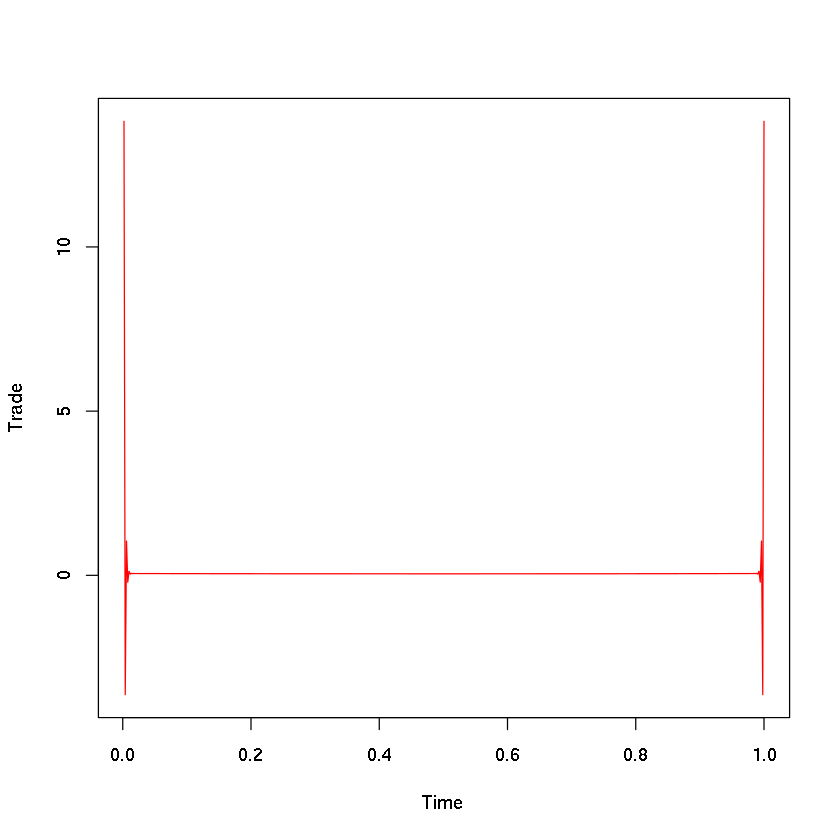

In [2]:
v <- rep(1/10000, N)
v <- solve(G) %*% v
plot(seq(1/N, 1, 1/N), v, type = "l", col = "red",xlab = "Time ", ylab = "Trade")

## Optimal interval VWAP strategy in the square-root model

### 2. (12 points)

Consider equation (11) of Lecture 10 for the cost of liquidation using interval VWAPs:

$$
\cC=\sum_{j=1}^m\,C_{jj}+\sum_{i< j}^m\,C_{ji}.
$$

(a) With $m=3$ (that is 3 interval VWAP slices), and assuming the square-root process where

$$
h(v)=\frac  3 4 \sigma\,\sqrt{\frac{v}{V}} =\frac  3 4 \sigma\,\sqrt{\frac{\dot x}{V}}, 
\quad \mbox{ and } \quad
G(\tau)=1/\sqrt{\tau},
$$

compute explicit expressions for the matrix elements $C_{ji}$ in terms of $x_1$, $x_2$, $t_1$, and $t_2$ (noting that $t_0=0$ and $t_3=T$).
#### <font color=blue> Solution (a)</font>

Substitute $h(v)$ and $G(\tau)$, we know

$$
\begin{align}
C_{ii} &=\frac{4}{3}\,x_i\,h(v_i)\,\sqrt{t_i-t_{i-1}} \\
&=\frac{\sigma}{\sqrt{V}}\,x_i^{3/2}
\end{align}
$$

$$
\begin{align}
C_{ji}=\frac{\sigma\,x_j\sqrt{x_i}}{\sqrt{V}}\,\frac{\left(t_{j}-t_{i-1}\right)^{3/2}
-\left(t_{j}-t_{i}\right)^{3/2}-\left(t_{j-1}-t_{i-1}\right)^{3/2}+\left(t_{j-1}-t_{i}\right)^{3/2}}{(t_{j}-t_{j-1})\sqrt{t_i-t_{i-1}}}
\end{align}
$$

So that
$$
\begin{align}
C_{11} &= \frac{\sigma}{\sqrt{V}} x_1^{3/2} \\
C_{22} &= \frac{\sigma}{\sqrt{V}} x_2^{3/2} \\
C_{33} &= \frac{\sigma}{\sqrt{V}} (X - x_1 - x_2)^{3/2} \\
C_{21} &= \sigma x_2 \sqrt{\frac{x_1}{V}} \frac{t_2^{3/2}-(t_2 - t_1)^{3/2}-t_1^{3/2}}{(t_2 - t_1) t_1^{1/2}} \\
C_{31} &= \sigma (X-x_1-x_2)\sqrt{\frac{x_1}{V}} \frac{T^{3/2}-(T - t_1)^{3/2}-t_2^{3/2}+(t_2-t_1)^{3/2}}{(t_3 - t_2) t_1^{1/2}} \\
C_{32} &= \sigma (X-x_1-x_2) \sqrt{\frac{x_2}{V}} \frac{(T - t_1)^{3/2}-(T - t_2)^{3/2}-(t_2 - t_1)^{3/2}}{(t_3 - t_2) (t_2 - t_1)^{1/2}}
\end{align}
$$

(b) Minimize the resulting expression for the expected cost of liquidation numerically to find optimal choices of $x_1$ and $x_2$ when $t_1=T/3$, and $t_2=2 \,T/3$.
#### <font color=blue> Solution (b)</font>

In [3]:
# substitute t1 and t2 into above formula
cost <- function(c) {
    c11 <- c[1]^(3/2)
    c22 <- c[2]^(3/2)
    c33 <- (1-c[1]-c[2])^(3/2)
    c21 <- c[2] * sqrt(c[1]) * (2*sqrt(2)-2)
    c31 <- (1-c[1]-c[2]) * sqrt(c[1]) * (3*sqrt(3)-4*sqrt(2) + 1)
    c32 <- (1-c[1]-c[2]) * sqrt(c[2]) * (2*sqrt(2)-2) 
    return(c11 + c22 + c33 + c21 + c31 + c32)
}
ui <- matrix(c(1,0,0,1,-1,-1), nrow=3, byrow=TRUE)  # linear constrain
optim <- constrOptim(c(0.3, 0.3), cost, NULL, ui=ui, ci=c(0, 0, -1))
optim

$par
[1] 6.470861e-01 3.256799e-16

$value
[1] 0.8832821

$counts
function gradient 
     368       NA 

$convergence
[1] 0

$message
NULL

$outer.iterations
[1] 3

$barrier.value
[1] 6.492318e-05


Thus the optimal choice of $x_1$ and $x_2$ is $0.647X$ and 0.

(c) What is the percentage saving from trading with the 3-slice strategy relative to a VWAP?
#### <font color=blue> Solution (c)</font>

In [4]:
saved = 1 - optim$value
saved

[1] 0.1167179

Thus we know it saved  11.67%

(d) Explain to your non-mathematical manager why this strategy has lower expected cost. 

#### <font color=blue> Solution (d)</font>
The reason is there is some time between trades when the market impact decay.
